## **Team ID : PNT2022TMID32310**

## **Customer Segmentation Analysis**

##**Clustering the data and performing classification algorithms**

## **Import Libraries**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2. Load the dataset into the tool.**

In [8]:
ig=pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
ig

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
ig.shape

(200, 5)

In [11]:
ig = ig.drop(columns=["CustomerID"],axis=1)
ig.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## **3. Perform Below Visualizations.**

## • **Univariate Analysis**

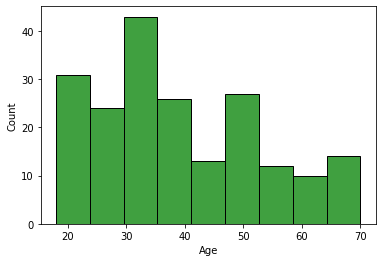

In [12]:
sns.histplot(x=ig.Age,color='Green')

## •**Bi-Variate Analysis**

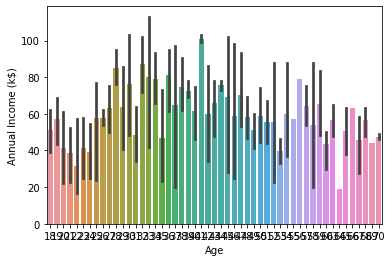

In [13]:
sns.barplot(x=ig.Age,y=ig['Annual Income (k$)'])

## • **Multi-Variate Analysis**

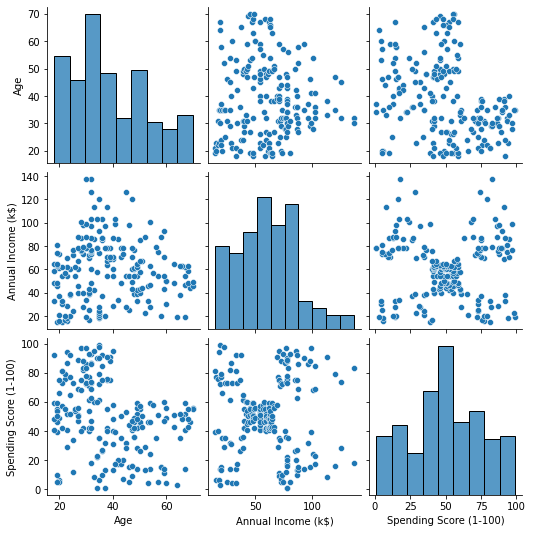

In [14]:
sns.pairplot(ig)

## **4. Perform descriptive statistics on the dataset.**

In [15]:
ig.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## **5. Check for Missing values and deal with them.**

In [16]:
ig.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [17]:
ig.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64



> There is no missing values so we go for next step.....



## **6. Find the outliers and replace them outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


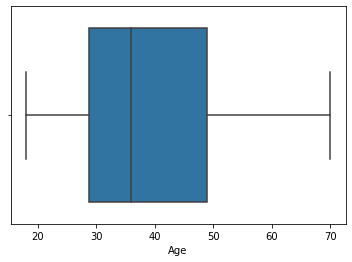

In [19]:
sns.boxplot(ig.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


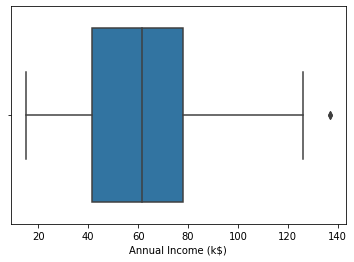

In [20]:
sns.boxplot(ig['Annual Income (k$)'])

In [21]:
ig['Annual Income (k$)'].median()                        

61.5

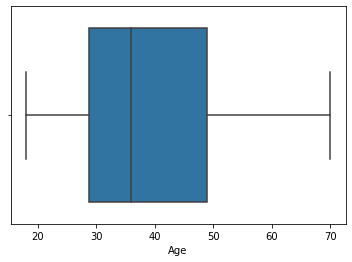

In [22]:
q1=ig['Annual Income (k$)'].quantile(0.25)
q3=ig['Annual Income (k$)'].quantile(0.75)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

ig['Annual Income (k$)']= np.where(ig['Annual Income (k$)']>upper_limit,61,ig['Annual Income (k$)'])
sns.boxplot(x=ig.Age,showfliers=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


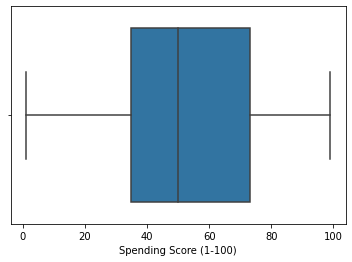

In [23]:
sns.boxplot(ig['Spending Score (1-100)'])

## **7. Check for Categorical columns and perform encoding**

## • **Label encoding**

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

ig.Gender=le.fit_transform(ig.Gender)

ig.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## **8. Scaling the data**

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(ig)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.        , 0.25      , 0.01801802, 0.39795918]])

## **9. Perform any of the clustering algorithms**

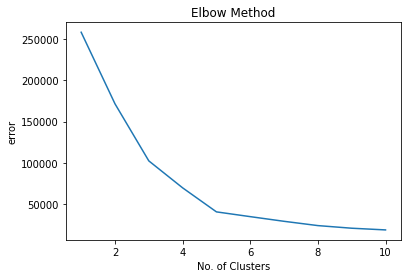

In [26]:
target = ig[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
from sklearn.cluster import KMeans

error = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(target)
    error.append(km.inertia_)

plt.plot(range(1, 11), error)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('error')
plt.show()

In [27]:
k_means = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = k_means.fit_predict(target)

In [28]:
k_means

KMeans(n_clusters=5, random_state=0)

In [29]:
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

## **10. Add the cluster data with the primary dataset**

In [30]:
ig['Outcome'] = pd.Series(y_means)

In [31]:
ig.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Outcome
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3


## **11. Split the data into dependent and independent variables.**

## **( i ) Independent variable**

In [32]:
x=ig.drop(columns=['Outcome'],axis = 1)
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## **( ii ) Dependent variable**

In [33]:
y = ig.Outcome
y.head()

0    3
1    4
2    3
3    4
4    3
Name: Outcome, dtype: int32

## **12. Split the data into training and testing**

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [35]:
x_train.shape

(160, 4)

In [36]:
x_test.shape

(40, 4)

In [37]:
y_train.shape

(160,)

In [38]:
y_test.shape

(40,)

## **13. Build the Model**

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [40]:
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [41]:
y_predict = model.predict(x_test)

In [42]:
y_predict_train = model.predict(x_train)

##**14. Train the Model**

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [44]:
print('Training accuracy: ',accuracy_score(y_train,y_predict_train))

Training accuracy:  0.99375


## **15. Test the Model**

In [45]:
print('Testing accuracy: ',accuracy_score(y_test,y_predict))

Testing accuracy:  1.0


## **16. Measure the performance using Metrics**

In [46]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4
Outcome,,,,,
0,12,0,0,0,0
1,0,17,0,0,0
2,0,0,5,0,0
3,0,0,0,3,0
4,0,0,0,0,3


In [47]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

